<h1> <center> MNIST Classification Using Dense Network </center> </h1>
<hr></hr>

<h2> <b>Step 1:</b> Importing all the required packages. </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

<hr></hr>
<h2> <b>Step 2:</b> Loading the Dataset </h2>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('There are {} training images, and each image is of size {} x {}'.
      format(x_train.shape[0],x_train.shape[1], x_train.shape[2]))

print('There are {} test images, and each image is of size {} x {}'.
      format(x_test.shape[0],x_test.shape[1], x_test.shape[2]))

There are 60000 training images, and each image is of size 28 x 28
There are 10000 test images, and each image is of size 28 x 28


<hr></hr>
<h2> <b>OPTIONAL STEP: Just to display the dataset for better understanding</b> </h2>

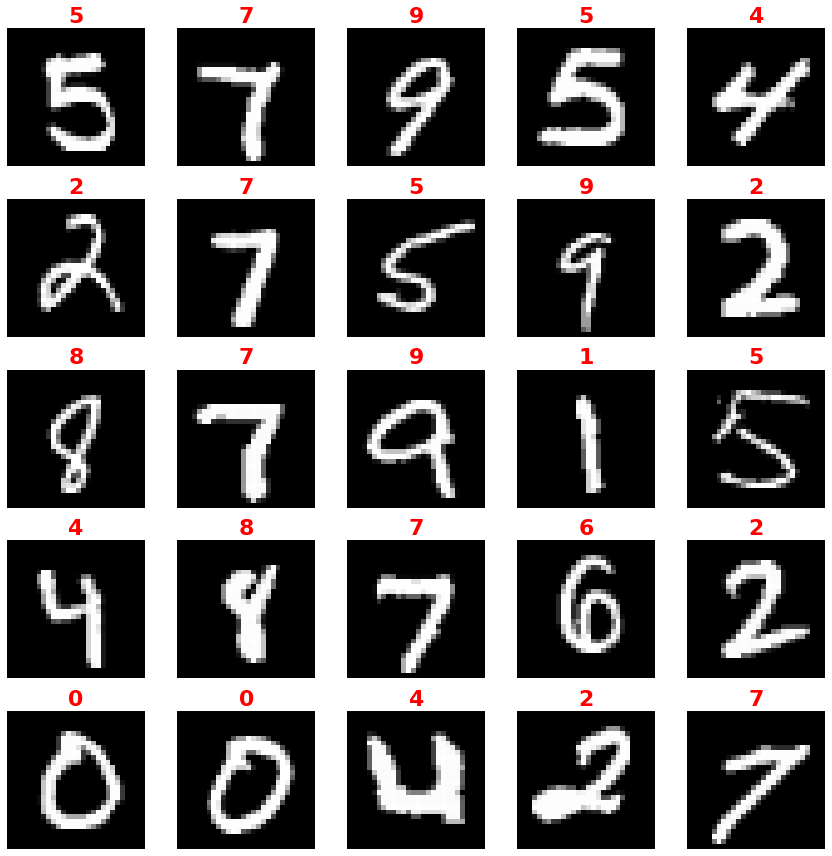

In [3]:
n = np.random.randint(0, 60000, 25)
plt.figure(figsize = (12, 12))
for i in range(0, len(n)):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[n[i]], cmap = 'gray')
  plt.title(y_train[n[i]], color = 'red', fontweight = 'bold', fontsize = 22)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0



<hr></hr>
<h2><b> Step 3: Using TensorFlow to Build the Model </b></h2>

We, will use the TensorFlow library to build the model for training the data as follows:

In [5]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10)
                                    ])


model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(x = x_train, y = y_train,
    epochs=10,
    validation_split=0.1,
)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2798 - sparse_categorical_accuracy: 0.9204 - val_loss: 0.1262 - val_sparse_categorical_accuracy: 0.9633
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1242 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.0937 - val_sparse_categorical_accuracy: 0.9747
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.0813 - val_sparse_categorical_accuracy: 0.9772
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0622 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0887 - val_sparse_categorical_accuracy: 0.9742
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0467 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0764 - val_sparse_categorical_accuracy: 0.9787
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0367 - spars

<hr></hr>

<h2><b> Step 4: Evaluating the Model </b></h2>

Let's evaluate our trained model on the test dataset.

In [6]:
loss, acc = model.evaluate(x = x_test, y = y_test)
print('\n Loss: {} \n Accuracy: {}'.format(loss, acc))

313/313 [==============================] - 0s 960us/step - loss: 0.0881 - sparse_categorical_accuracy: 0.9761

 Loss: 0.08810646086931229 
 Accuracy: 0.9761000275611877


<hr></hr>

<h2><b> Step 5: Prediction </b></h2>

Let's see what our model predicts for future images.
<hr></hr>


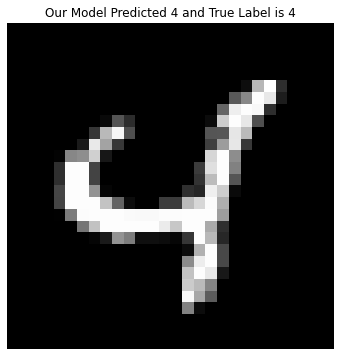

In [7]:
num = 67
img = x_test[num]
y1 = model.predict(img[np.newaxis,...])
np.argmax(y1)

plt.figure(figsize = (6, 6))
plt.imshow(img, cmap = 'gray')
plt.title('Our Model Predicted {} and True Label is {}'.format(np.argmax(y1), y_test[num]))
plt.axis('off')
plt.show()

<hr></hr>
<hr></hr>
<h1> <center> MNIST Classification Using Convolutional Neural Network </center> </h1>
<hr></hr>
<hr></hr>

<h2><b> Desining a CNN</b></h2>



In [8]:
# reshaping the inputs
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [9]:
conv_model = tf.keras.models.Sequential()
conv_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
conv_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
conv_model.add(tf.keras.layers.Flatten())
conv_model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
conv_model.add(tf.keras.layers.Dense(10))

conv_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


conv_model.fit(x = x_train, y = y_train,
    epochs=10,
    validation_split=0.1,
)

Epoch 1/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1413 - sparse_categorical_accuracy: 0.9561 - val_loss: 0.0617 - val_sparse_categorical_accuracy: 0.9827
Epoch 2/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0459 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0606 - val_sparse_categorical_accuracy: 0.9850
Epoch 3/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0289 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.0518 - val_sparse_categorical_accuracy: 0.9875
Epoch 4/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0186 - sparse_categorical_accuracy: 0.9940 - val_loss: 0.0495 - val_sparse_categorical_accuracy: 0.9888
Epoch 5/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0126 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.0549 - val_sparse_categorical_accuracy: 0.9868
Epoch 6/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.

<hr></hr>

<h2><b> Step 4: Evaluating the Model </b></h2>

Let's evaluate our trained model on the test dataset.

In [10]:
loss, acc = conv_model.evaluate(x = x_test, y = y_test)
print('\n Loss: {} \n Accuracy: {}'.format(loss, acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0.9863

 Loss: 0.06384333223104477 
 Accuracy: 0.986299991607666


<hr></hr>

<h2><b> Step 5: Prediction </b></h2>

Let's see what our model predicts for future images.
<hr></hr>

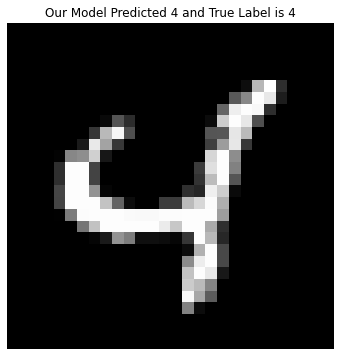

In [12]:
num = 67
img = x_test[num]
y1 = conv_model.predict(img[np.newaxis,:,:,np.newaxis])
np.argmax(y1)

plt.figure(figsize = (6, 6))
plt.imshow(img[:,:,0], cmap = 'gray')
plt.title('Our Model Predicted {} and True Label is {}'.format(np.argmax(y1), y_test[num]))
plt.axis('off')
plt.show()